Simulação
=========



## Tipos de experimentos



Quando Mendel estudou o processo de reprodução de ervilhas, ele realizou um *experimento científico controlado*. Com os resultados do seu experimento, Mendel reportou o que é considerado hoje a base dos estudos de genética.

O experimento de Mendel e de tantos outros cientistas acontece &ldquo;no mundo real&rdquo;, ou seja, são processos naturais/sociais que ocorrem ao longo do tempo e que são estudados com o intuito de testar hipóteses.

Existem também experimentos computacionais. Tratam-se de simulações de processos naturais/sociais realizadas dentro do computador por meio de códigos.



## Os passos de um experimento computacional



1.  Decidir o que você vai simular. Você irá simular o jogar de uma moeda? Um jogo de cartas? Átomos interagindo entre si? Nesta etapa, é interessante ter em mente a pergunta que você gostaria de responder com seu experimento;

2.  Elaborar um código que realiza uma simulação do início ao fim;

3.  Decidir quantas vezes você gostaria de rodar esta simulação no seu experimento;

4.  Rodar a simulação o número de vezes que você decidiu no passo 3 (idealmente dentro de um laço de repetição). Cada vez que rodar a simulação, você deve registrar o resultado obtido;

5.  Investigar os resultados obtidos na luz da pergunta definida no passo 1.



## O experimento da moeda



Vamos simular o jogar de uma moeda. Nossa pergunta é: quantas vezes em média nós tiramos *cara* ao jogar uma moeda 10 vezes?

O próximo passo agora é simular o jogar de uma moeda! Para isso, podemos usar o `choice` do módulo random.



In [3]:
from random import choice


def jogar_moeda():
    return choice(["cara", "coroa"])


def jogar_10_moedas():
    resultado = []
    for _ in range(10):
        resultado.append(jogar_moeda())
    return resultado


print(jogar_10_moedas())

['cara', 'coroa', 'cara', 'coroa', 'cara', 'cara', 'cara', 'coroa', 'coroa', 'cara']


Quantas vezes iremos realizar uma simulação neste experimento? Quanto mais vezes realizamos, melhor será nossa confiança no resultado. Vamos definir que neste caso iremos realizar 1000 simulações.

Agora precisamos rodar nossa simulação 1000 vezes e registrar o resultado. Qual resultado que queremos? Isso vai depender da nossa pergunta. No nosso caso aqui, queremos o número de vezes que tiramos *cara* na moeda.



In [4]:
import statistics as st


def experimento(n):
    resultado_global = []
    for _ in range(n):
        resultado_local = jogar_10_moedas()
        numero_cara = resultado_local.count("cara")
        resultado_global.append(numero_cara)
    return resultado_global


num_repeticoes = 10
resultado = experimento(num_repeticoes)

media = st.mean(resultado)

print(f"Em média, o lançar de 10 moedas obtivemos {media} caras")

Em média, o lançar de 10 moedas obtivemos 4.7 caras


Podemos visualizar nosso resultado!



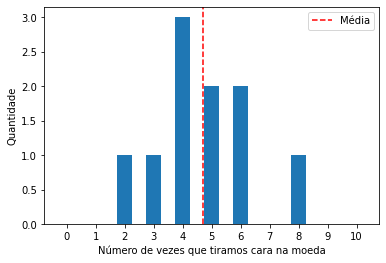

In [5]:
import matplotlib.pyplot as plt


figura, eixo = plt.subplots()
eixo.hist(resultado, bins=range(12), align="left", rwidth=0.5)
eixo.axvline(media, linestyle="--", color="red", label="Média")
eixo.set_xticks(range(11))
eixo.set_xlabel("Número de vezes que tiramos cara na moeda")
eixo.set_ylabel("Quantidade")
eixo.legend(loc=1)

# coloque o eixo y em escala log se quiser ver os valores muito pequeno
# eixo.set_yscale('log', nonpositive='clip')

In [6]:
import statistics as st

print(st.stdev(resultado))

1.70293863659264


## O experimento do dado



Vamos simular o jogar de um dado de seis faces. Nossa pergunta é: qual é a moda da soma dos números quando jogamos dois dados de seis faces?

O próximo passo agora é simular o lançar de dois dados! Para isso, podemos usar o `choice` do módulo random novamente.



In [7]:
def jogar_dado_seis_faces():
    return choice([1, 2, 3, 4, 5, 6])


def soma_dois_dados():
    return jogar_dado_seis_faces() + jogar_dado_seis_faces()


print(soma_dois_dados())

6


Quantas vezes iremos realizar uma simulação neste experimento? Novamente, vamos definir que neste caso iremos realizar 1000 simulações.

Agora precisamos rodar nossa simulação 1000 vezes e registrar o resultado. Qual resultado que queremos? A soma da jogada dos dados!



In [14]:
def experimento(n):
    resultado_global = []
    for _ in range(n):
        valor = soma_dois_dados()
        resultado_global.append(valor)
    return resultado_global


num_repeticoes = 10
resultado = experimento(num_repeticoes)

moda = st.mode(resultado)

media = st.mean(resultado)

print(f"A moda da soma de dois dados de seis faces é {moda}")
print(f"A media da soma de dois dados de seis faces é {media}")

A moda da soma de dois dados de seis faces é 8
A media da soma de dois dados de seis faces é 7


Novamente, podemos visualizar nosso resultado!



Text(0, 0.5, 'Quantidade')

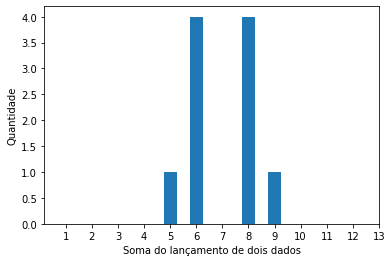

In [15]:
import matplotlib.pyplot as plt


figura, eixo = plt.subplots()
eixo.hist(resultado, bins=range(1, 14), align="left", rwidth=0.5)
eixo.set_xticks(range(1, 14))
eixo.set_xlabel("Soma do lançamento de dois dados")
eixo.set_ylabel("Quantidade")

# coloque o eixo y em escala log se quiser ver os valores muito pequeno
# eixo.set_yscale('log', nonpositive='clip')

## O problema de Monty Hall



Meus parabéns! Você acabou de ser sorteado e irá participar do programa de auditório do apresentador Monty Hall!

O jogo é muito simples: você tem na sua frente três portas fechadas, numeradas de 1 até 3. Atrás de uma destas portas está uma enorme quantidade de barras de ouro (obtidas de forma 100% ecologicamente e socialmente correta em todos os aspectos), o suficiente para você e as próximas 42 gerações da sua família viverem bem e livres de problemas financeiros. Atrás das outras duas portas tem, em cada uma delas, um livro de algoritmos escritos em Java, publicado em 1997, livre de qualquer valor comercial/sentimental e considerado absurdamente desatualizado por qualquer pessoa da área. Você não sabe em qual das três portas que estão as barras de ouro.

Sabendo disso, você deve escolher uma destas portas para abrir. Se a sorte estiver do seu lado, poderá sair deste programa sendo um mais novo milionário!

Ao escolher a porta que irá abrir, Monty Hall pergunta se você tem certeza da sua escolha e, se este for o caso, ele ainda não irá abrir a sua porta escolhida. O que Monty Hall faz é abrir uma das duas portas que *não* foram escolhidas, revelando que atrás desta porta que ele acabou de abrir tinha um livro de Java publicado em 1997.

Ao fazer isso (e ainda sem abrir a sua porta escolhida), Monty Hall te pergunta: &ldquo;e agora meu caro, você gostaria de manter a sua escolha ou gostaria de trocar a sua escolha?&rdquo;

Esta é sua última chance! Independente se você optar por manter a escolha inicial ou se optar por mudar, Monty Hall irá acatar sua escolha e abrir a porta que você escolher.

Suponha que seu objetivo seja abrir a porta com as barras de ouro, qual das opções abaixo você acredita que é a melhor estratégia:

1.  Você deve se manter na porta que escolheu inicialmente

2.  Você deve trocar a sua escolha inicial

3.  Tanto faz se você ficar na porta que escolheu inicialmente ou se trocar de porta, a chance de abrir a porta com barras de ouro não muda, logo não existe uma melhor estratégia neste caso

Sua tarefa é refletir sobre este problema, e tentar responder ele (em um primeiro momento) sem o uso de simulação computacional.

Após refletir, realize um experimento computacional para checar qual das 3 estratégias é a melhor.



In [20]:
def monty_hall():
    portas_possiveis = [1, 2, 3]
    porta_escolhida = choice(portas_possiveis)
    porta_ouro = choice(portas_possiveis)
    
    if porta_escolhida == porta_ouro:
        ganha_se_ficar = True
    else:
        ganha_se_ficar = False
        
    return ganha_se_ficar  
    

def experimento(n):
    resultado = []
    
    for _ in range(n):
        ganhou_ficando_na_porta_inicial = monty_hall()
        resultado.append(ganhou_ficando_na_porta_inicial)
        
    return resultado


num_repeticoes = 10000
resultado = experimento(num_repeticoes)

vezes_que_ganhou = resultado.count(True)

print(f"Jogando {num_repeticoes} vezes você ganhou {vezes_que_ganhou} ao não mudar de porta")

Jogando 10000 vezes você ganhou 3213 ao não mudar de porta


## XKCD relevante



![img](https://imgs.xkcd.com/comics/a_bunch_of_rocks.png)

`Imagem: A bunch of rocks (XKCD) disponível em https://xkcd.com/505`



## Referências



1.  [https://inferentialthinking.com/chapters/09/3/Simulation.html](https://inferentialthinking.com/chapters/09/3/Simulation.html)

2.  [https://inferentialthinking.com/chapters/09/4/Monty_Hall_Problem.html](https://inferentialthinking.com/chapters/09/4/Monty_Hall_Problem.html)

